# Car Sales Example

Use of Linear Regression to predict the price of an used car depending on its specifications

* Clean data
* Relax assumptions
* Log transformation
* Create a model
* Create dummies 

## 01. Import libraries

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

## 02. Load Data

In [2]:


# to have access to my drive
from google.colab import drive
drive.mount('/content/gdrive')

raw_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml101/sklearn/1.04. Real-life example.csv')
raw_data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 03. Preprocessing

### Check the potential regressors

1. Brand: There are brands more expensive than others
2. Mileage: The more a car is driven, the cheaper it should be 
3. Engine Volume: Expensive cars usually have larger engines than economy cars
4. Year (year of production) : Usually the older the car, the cheaper it is 


### 03.01. Explore the descriptive statistics of the variables

It's the easiest way to check your data and spot problems
- Missing Values
- Count amount of unique values for our categorical data 
- See the most frequent value in our categorical values
    - If there is a value that cover most of the data, it is a useless variable



In [3]:
raw_data.describe(include = 'all')
#parameters to include categorical data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### 03.02. Determining the variables of interest

'Model' variable will be removed because could be explained by other variables (Brand, Year, EngineV)



In [4]:
data = raw_data.drop(['Model'],axis=1)
#axis 0 = rows
#axis 1 = columns 
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### 03.03 Dealing with missing values

Rule of thumb: if we are removing < 5% of the observations,it's ok to remove all Missing Values

In [5]:
data.isnull().sum()
#useful to detect missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis = 0)
#to remove missing observaions(rows)

In [7]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### 03.04 Exploring the PDFs 

For optimal results we are looking for normal distributions.


If we don't have Normal Distribution could be because **outliers**, the best way to detect them is with the *describe* table (min,mean,percentiles)

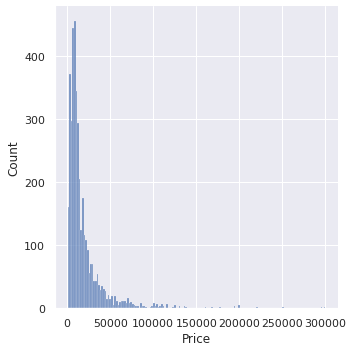

In [8]:
sns.displot(data_no_mv['Price'])

### 03.05. Dealing with outliers

Outliers: Observations that lie on abnormal distance from other observations in the data

Solution: Remove 1% of the observations


In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


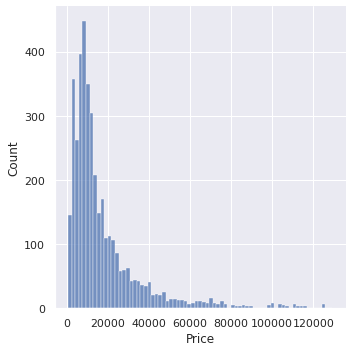

In [10]:
sns.displot(data_1['Price'])

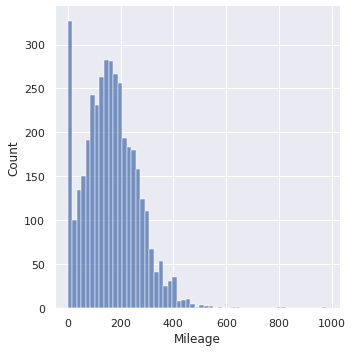

In [11]:
## Fix Mileage
sns.displot(data_1['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

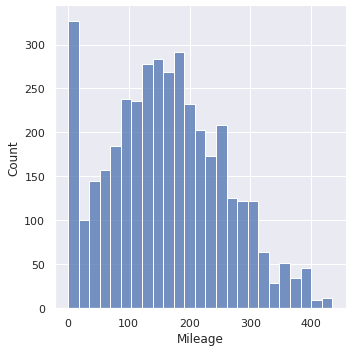

In [13]:
sns.displot(data_2['Mileage'])

In [14]:
# Fix Engine Volume

Here we use the problem knowledge, we know that Engine Volume can't be > 6.5  but our data set has those values. They are Missing Values

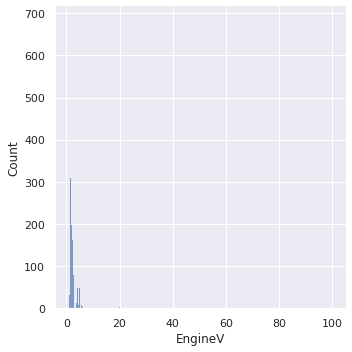

In [15]:
sns.displot(data_2['EngineV'])

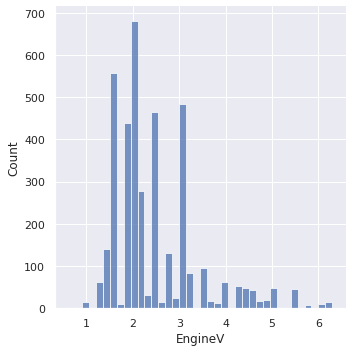

In [16]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.displot(data_3['EngineV'])

In [17]:
# Fix Year Variable 

To fix it we remove now the first percentile

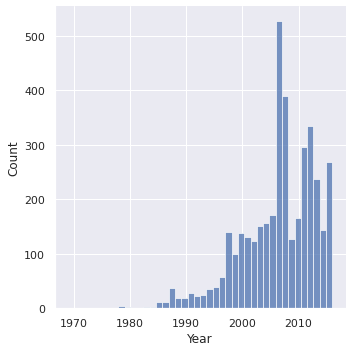

In [18]:
sns.displot(data_3['Year'])

In [19]:

q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

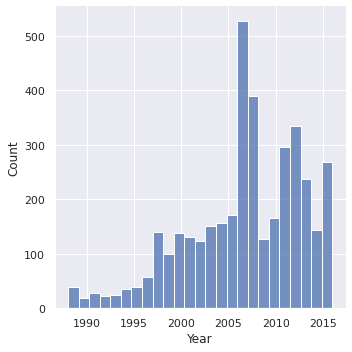

In [20]:
sns.displot(data_4['Year'])

In [21]:
data_cleaned = data_4

### 03.06. Remove indices from data removed 

Reset index 



In [22]:
data_cleaned = data_4.reset_index(drop=True)
#paramater for removing the old index

In [23]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## 04. OLS Assumptions


### 04.01. Linearity

Check with plots, each numeric variable with our dependent variable

If data shows exponential patterns, log transformations are useful

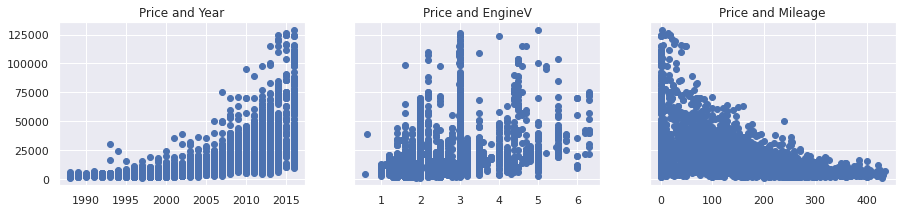

In [24]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

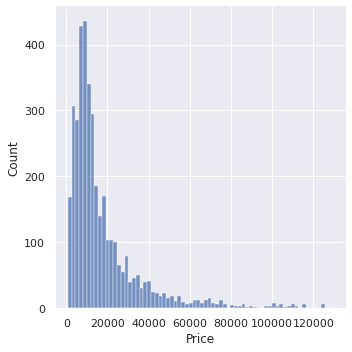

In [25]:
sns.displot(data_cleaned['Price'])

#### 04.01.01 Relaxing Linearity

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


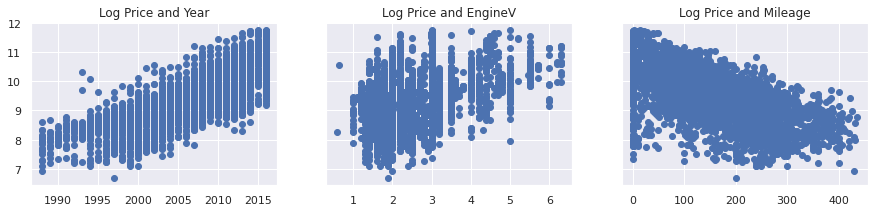

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [28]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)
#remove the original Price Value

### 04.02. No endogeneity 

There is a test for check if it is violated

Or we can check the residuals and find the correlations with each independent *x*, which should be close to zero 

It's computed after the regression is created

### 04.03. Normality And Homoscedasticity 

* Normality (error)

It is assumed for big samples becuase the Central Limit Theorem 

* Zero Mean  (error)

The zero mean in the distribution of errors is accomplished with the inclusion of the intercept in the regresion 

* Homoscedasticity 

Equal variance for each error observation. It was handled with the log transformation, the sample data is not so spread as before.





### 04.04. No Autocorrelation 

It means no serial correlation between the observation errors

Because our observations that we have are not coming from time series data or panel data we can ignore it 

There is no reason for the observations to be correlated 

### 04.05. Multicollinearity

We have to check the correlation between the features(variables)





#### 04.05.01 VIF (Variance inflation factor)

It's one of the best ways to check for multicollinearity.

VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to the situation where the variable was completely uncorrelated with the other predictors.


In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV'] ] ## all numerical variables
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns 

vif in [1,+inf)

vif = 1: no multicollinearity 

1 < VIF < 5 perfectly okay

In [31]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [32]:
#remove variables
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

## 05. Dummy Variables 

If we have *N* categories for a feature, we have to create *N-1* dummies, the last one is determined by a **Zero Vector** of the *N-1* other dummies. This is to avoid multicollinearity

In [33]:
data_with_no_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)
#spots all categorical variables and creates dummies automatically
#parameter to avoid multicollinearity


In [34]:
data_with_no_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## 06. Reorder the columns

In [35]:
data_with_no_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
new_order = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
data_preprocessed = data_with_no_dummies[new_order]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## 07. Linear Regression Model

### 07.01. Inputs and Targets



In [38]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

### 07.02. Standadization

it is not usually recommended to standardize dummy variables. In M.L. is not an issue because scaling has no effect on the predictive power of dummies.

But one scaled, they lose all their dummy meaning 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaler.fit(inputs)

StandardScaler()

In [41]:
inputs_scaled = scaler.transform(inputs)

### 07.03 Split Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,random_state= 365,test_size=0.2)

print(x_train.shape)
print(y_train.shape)

(3093, 17)
(3093,)


### 07.04 Create Model

log-linear regression model 

In [43]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#### 07.04.01 Plot Results 

A simple way to check the final result is to plot the predicted values against the observed values. The better our graphic match a 45 degree line, the better the prediction

In [44]:
y_hat = model.predict(x_train)
#inferred value 

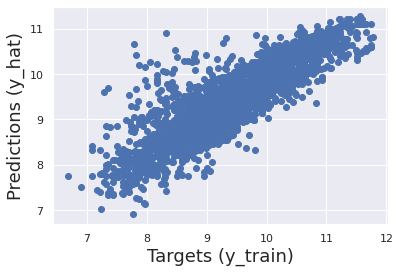

In [45]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

#### 07.04.02 Residual plot

The residuals are the difference between the targets and the predictions, the estimates of the errors. The residuals plot refers to the distribution of the residuals, because ot the assumption, we know that it should be normal distributed with a  mean of zero.

Text(0.5, 1.0, 'Residual PDF')

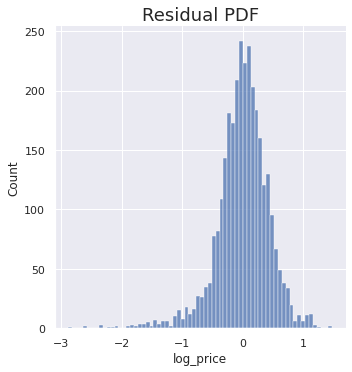

In [46]:
sns.displot(y_train-y_hat)
plt.title('Residual PDF',size = 18)

#### 07.04.03 R-Squared 

The percent of how much our model explain the variability of the data

In [47]:
model.score(x_train,y_train)

0.744996578792662

#### 07.04.04 Bias and Weights

For the dummy variables, the missing feature is the benchmark (zero) 

For the continuous variables, the weight represent the importance in the model. 


In [48]:
inputs.columns.values

array(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [49]:
features = ['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes','Intercept']

In [50]:
weights = model.coef_
weights = np.append(weights,model.intercept_)

In [51]:
summary = pd.DataFrame(data = features,columns = ['Features'])
summary['Weights'] = weights
summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## 08. Testing


In [52]:
#test predictions 
y_hat_test = model.predict(x_test)

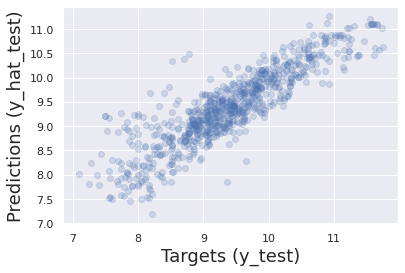

In [53]:
#plot results (target vs predictions)
plt.scatter(y_test,y_hat_test,alpha=0.2)
#alpha to measure the concentration of our data
plt.xlabel('Targets (y_test)',size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.show()